In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/kaggle/input/language-detection-dataset/languages.csv")

In [3]:
df.shape

(763684, 2)

In [4]:
df.head()

,text,language
0,ich denke es handelt sich hier um ein missvers...,german
1,ich habe tom gerade erst verlassen,german
2,tom versuchte mary nur zu ärgern,german
3,tom hat mir die hand geküsst,german
4,ich wusste dass dir das gefiele,german


In [5]:
df['language'].value_counts()

language
english    275687
german     199618
french     169693
spanish    118686
Name: count, dtype: int64

In [6]:
df.sample(50).to_csv("sample.csv")

In [7]:
langs = df['language'].unique()
print("Languages found:", langs)

Languages found: ['german' 'french' 'spanish' 'english']


In [10]:
balanced_parts=[]
for lang in langs:
    lang_df = df[df['language'] == lang]

    sampled = lang_df.sample(n=20000, random_state=42)
    balanced_parts.append(sampled)

# Combine all languages
balanced_df = pd.concat(balanced_parts)

# Shuffle the final dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [13]:
balanced_df["language"].value_counts()

language
spanish    20000
english    20000
german     20000
french     20000
Name: count, dtype: int64

In [14]:
df=balanced_df

In [16]:
df["language"].value_counts()

language
spanish    20000
english    20000
german     20000
french     20000
Name: count, dtype: int64

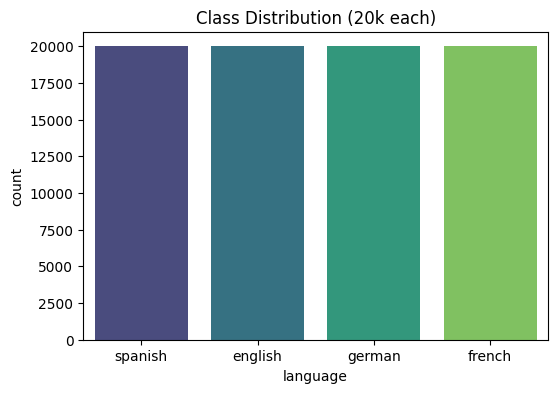

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="language", palette="viridis")
plt.title("Class Distribution (20k each)")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

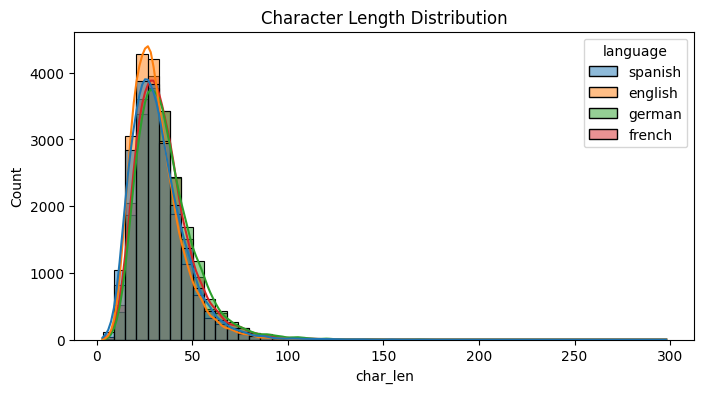

In [19]:
df["char_len"] = df["text"].astype(str).apply(len)

plt.figure(figsize=(8,4))
sns.histplot(df, x="char_len", hue="language", kde=True, bins=50)
plt.title("Character Length Distribution")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

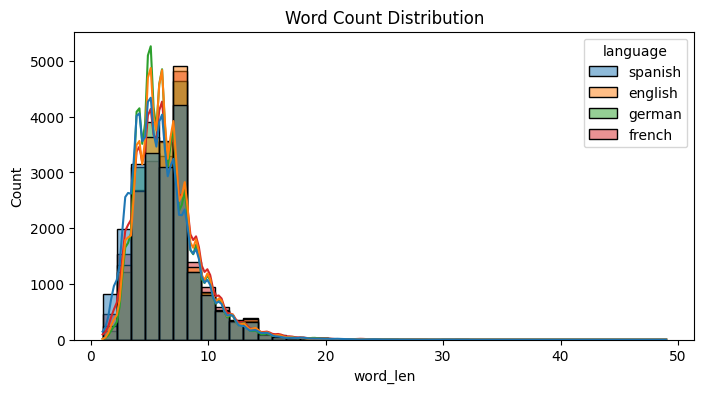

In [20]:
df["word_len"] = df["text"].astype(str).apply(lambda x: len(x.split()))

plt.figure(figsize=(8,4))
sns.histplot(df, x="word_len", hue="language", kde=True, bins=40)
plt.title("Word Count Distribution")
plt.show()

In [21]:
for lang in df["language"].unique():
    print(f"\n🔹 EXAMPLES FROM {lang.upper()}:")
    print(df[df["language"] == lang].sample(5)["text"].tolist())


🔹 EXAMPLES FROM SPANISH:
['muéstrame cómo hacer eso', 'él se gana la vida cantando', 'me arriesgaré', 'en realidad no me interesa la política', 'comamos fuera']

🔹 EXAMPLES FROM ENGLISH:
['tom knows the capital of each state in the united states', 'tom stayed here', 'he came late as is often the case with him', 'is that seriously what you think', 'i hope todays ball game wont be canceled']

🔹 EXAMPLES FROM GERMAN:
['sie hörte ihn singen', 'dem chef gefällt toms wirdgemachteinstellung', 'tom scheint sehr glücklich zu sein', 'er pfiff ein liedchen', 'tom kann nicht einmal den anblick von mary ertragen']

🔹 EXAMPLES FROM FRENCH:
['les choses vont peutêtre être un peu rudes', 'jai besoin dinternet', 'les chats sont plus malins que vous ne pensez', 'je nai pas vraiment besoin de votre aide', 'cest difficile de prévoir à manger pour autant de gens']


In [22]:
import re
import unicodedata

def preprocess_text(text):
    if not isinstance(text, str):
        return ""

    # 1. Lowercase
    text = text.lower()

    # 2. Normalize unicode (keeps accents)
    text = unicodedata.normalize("NFKC", text)

    # 3. Remove URLs
    text = re.sub(r'http\S+|www\.\S+', '', text)

    # 4. Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # 5. Remove unnecessary punctuation repetitions
    text = re.sub(r'([!?.,])\1+', r'\1', text)

    # 6. Replace multiple spaces with single space
    text = re.sub(r'\s+', ' ', text).strip()

    return text


In [23]:
df["clean_text"] = df["text"].apply(preprocess_text)
df.head()

,text,language,char_len,word_len,clean_text
0,tom no pudo evitar enfadarse con mary,spanish,37,7,tom no pudo evitar enfadarse con mary
1,hace más viento hoy que ayer,spanish,28,6,hace más viento hoy que ayer
2,he refused my friend request,english,28,5,he refused my friend request
3,youre starting to sound like your old man,english,41,8,youre starting to sound like your old man
4,yo normalmente lleno el coche en esta estación...,spanish,58,10,yo normalmente lleno el coche en esta estación...


In [24]:
df=df[["clean_text","language"]]

In [27]:
df.isnull().sum()

clean_text    0
language      0
dtype: int64

In [29]:
df.duplicated().sum()

11

In [30]:
from sklearn.model_selection import train_test_split

# df is your preprocessed dataframe with columns:
# "clean_text" and "language"

train_df, test_df = train_test_split(
    df,
    test_size=0.20,
    random_state=42,
    stratify=df["language"]   # ensures equal class distribution
)

print("Train size:", len(train_df))
print("Test size:", len(test_df))
print("\nTrain distribution:")
print(train_df["language"].value_counts())
print("\nTest distribution:")
print(test_df["language"].value_counts())


Train size: 64000
Test size: 16000

Train distribution:
language
french     16000
german     16000
spanish    16000
english    16000
Name: count, dtype: int64

Test distribution:
language
german     4000
english    4000
spanish    4000
french     4000
Name: count, dtype: int64


In [31]:
from datasets import Dataset

# Convert train and test Pandas DataFrames to HF Datasets
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

train_dataset, test_dataset


(Dataset({
     features: ['clean_text', 'language', '__index_level_0__'],
     num_rows: 64000
 }),
 Dataset({
     features: ['clean_text', 'language', '__index_level_0__'],
     num_rows: 16000
 }))

In [32]:
train_dataset = train_dataset.rename_column("clean_text", "text")
test_dataset = test_dataset.rename_column("clean_text", "text")


In [33]:
train_dataset[0]


{'text': 'avezvous cela également dans dautres couleurs',
 'language': 'french',
 '__index_level_0__': 61380}

In [34]:
train_dataset = train_dataset.remove_columns(["__index_level_0__"])
test_dataset = test_dataset.remove_columns(["__index_level_0__"])

In [35]:
train_dataset[0]

{'text': 'avezvous cela également dans dautres couleurs', 'language': 'french'}

In [36]:
from transformers import AutoTokenizer

model_name = "xlm-roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

In [37]:
def tokenize_function(batch):
    return tokenizer(
        batch["text"],
        padding="max_length",
        truncation=True,
        max_length=64
    )


In [38]:
train_dataset_encoded = train_dataset.map(tokenize_function, batched=True)
test_dataset_encoded = test_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/64000 [00:00<?, ? examples/s]

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

In [39]:
# Rename label column
train_dataset_encoded = train_dataset_encoded.rename_column("language", "labels")
test_dataset_encoded = test_dataset_encoded.rename_column("language", "labels")

# Remove text columns
train_dataset_encoded = train_dataset_encoded.remove_columns(["text"])
test_dataset_encoded = test_dataset_encoded.remove_columns(["text"])

In [40]:
unique_labels = sorted(set(df["language"]))
label2id = {label: i for i, label in enumerate(unique_labels)}

train_dataset_encoded = train_dataset_encoded.map(lambda x: {"labels": label2id[x["labels"]]})
test_dataset_encoded = test_dataset_encoded.map(lambda x: {"labels": label2id[x["labels"]]})


Map:   0%|          | 0/64000 [00:00<?, ? examples/s]

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

In [41]:
label2id

{'english': 0, 'french': 1, 'german': 2, 'spanish': 3}

In [42]:
from transformers import AutoModelForSequenceClassification

num_labels = 4   # english, french, german, spanish

model = AutoModelForSequenceClassification.from_pretrained(
    "xlm-roberta-base",
    num_labels=num_labels,
    id2label={0: "english", 1: "french", 2: "german", 3: "spanish"},
    label2id={"english": 0, "french": 1, "german": 2, "spanish": 3}
)

model


2025-12-09 15:30:40.548882: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765294240.777613      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765294240.845028      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


XLMRobertaForSequenceClassification(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=

In [44]:
!pip install evaluate

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [53]:
import evaluate

accuracy_metric = evaluate.load("accuracy")
precision_metric = evaluate.load("precision")
recall_metric = evaluate.load("recall")
f1_metric = evaluate.load("f1")

In [54]:
import numpy as np

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)

    accuracy = accuracy_metric.compute(predictions=preds, references=labels)
    precision = precision_metric.compute(predictions=preds, references=labels, average="weighted")
    recall = recall_metric.compute(predictions=preds, references=labels, average="weighted")
    f1 = f1_metric.compute(predictions=preds, references=labels, average="weighted")

    return {
        "accuracy": accuracy["accuracy"],
        "precision": precision["precision"],
        "recall": recall["recall"],
        "f1": f1["f1"]
    }


In [55]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="xlmr-lang-detection",     # folder to save model
    eval_strategy="epoch",          # evaluate after each epoch
    save_strategy="epoch",                # save model each epoch
    logging_strategy="steps",
    logging_steps=200,                    # log every 200 steps

    learning_rate=2e-5,                   # good for XLM-R
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,

    num_train_epochs=2,                   # enough with 80k samples
    warmup_ratio=0.1,                     # stabilizes training
    weight_decay=0.01,                    # regularization

    load_best_model_at_end=True,
    metric_for_best_model="f1",           # choose best based on F1
    greater_is_better=True,

    push_to_hub=False,
    report_to="none"
)


In [56]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_encoded,
    eval_dataset=test_dataset_encoded,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)


/tmp/ipykernel_47/2234910293.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [57]:
trainer.train()

/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.004700,0.008242,0.998625,0.998625,0.998625,0.998625
2,0.007700,0.007872,0.998687,0.998688,0.998687,0.998687


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


TrainOutput(global_step=2000, training_loss=0.006134428113698959, metrics={'train_runtime': 1392.1483, 'train_samples_per_second': 91.944, 'train_steps_per_second': 1.437, 'total_flos': 4209852481536000.0, 'train_loss': 0.006134428113698959, 'epoch': 2.0})

In [61]:
trainer.evaluate()

/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


{'eval_loss': 0.007872363552451134,
 'eval_accuracy': 0.9986875,
 'eval_precision': 0.9986875616561243,
 'eval_recall': 0.9986875,
 'eval_f1': 0.9986873747890136,
 'eval_runtime': 51.3341,
 'eval_samples_per_second': 311.684,
 'eval_steps_per_second': 4.87,
 'epoch': 2.0}

In [62]:
import torch

def predict_language(text):
    inputs = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        padding="max_length",
        max_length=64
    )

    # Move inputs to the same device as model
    inputs = {k: v.to(model.device) for k, v in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=1).item()

    id2label = {0: "english", 1: "french", 2: "german", 3: "spanish"}
    return id2label[predicted_class]


In [63]:
print(predict_language("Hello, how are you?"))
print(predict_language("¿Dónde estás ahora?"))
print(predict_language("Je suis très heureux aujourd’hui"))
print(predict_language("Ich möchte ein Bier bitte"))

english
spanish
french
german
